In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from sklearn import tree
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression, LassoCV, Ridge, RidgeCV,Lasso
from sklearn.metrics import mean_absolute_error, confusion_matrix
from sklearn import metrics
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import svm
from sklearn.model_selection import KFold,LeaveOneOut, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.metrics import mean_squared_error

In [3]:
# Read the data set and get a breif look at the values 
data = pd.read_csv("train.csv")
dataTest = pd.read_csv("test.csv")

nrows,ncols = data.shape
print(data.describe())
data.head()
print(data.isnull().sum())
data.head()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
partyNames = data['Name'].str[:5]
partyKey = partyNames.unique()
len(partyKey)

634

In [5]:
# Impute missing data values
ageMissing = data[['Age','SibSp','Parch']].values.reshape(nrows,3)
imp = IterativeImputer(max_iter = 10, random_state = 0)
imp.fit(ageMissing)
imputedAges = (imp.transform(ageMissing))
data[['Age','SibSp','Parch']] = imputedAges
data.head()
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.head()
dep = data[['Survived']]
ind = pd.get_dummies(data, columns = ['Embarked','Sex','Pclass']).drop(['Survived','Ticket','Cabin','Name'],axis = 1) # Encode the categorical features
ind.describe()

,PassengerId,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.726029,0.523008,0.381594,32.204208,0.188552,0.086420,0.722783,0.352413,0.647587,0.242424,0.206510,0.551066
std,257.353842,13.411054,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876,0.477990,0.477990,0.428790,0.405028,0.497665
min,1.000000,-3.894009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,30.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.500000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Validation split
X_train, X_test,y_train,y_test = train_test_split(ind,dep,test_size=0.2,random_state=1)

In [8]:
# Logistic Regresssion 
log = LogisticRegression(max_iter = 100000,solver='lbfgs',multi_class='ovr',dual=False)
log_1 = log.fit(X_train,np.asarray(y_train).ravel())
pred = log_1.predict(X_test)
cfMat = confusion_matrix(y_test,pred)
cfMat
acc = (cfMat[1,1] + cfMat[0,0])/(cfMat[1,1]+cfMat[0,0]+cfMat[0,1]+cfMat[1,0])
print("Acc",acc)
cfDf = pd.DataFrame(data=cfMat, index = ["Negative","Positive"], columns = ["Negative","Positive"])
print(cfDf)

Acc 0.7932960893854749
          Negative  Positive
Negative        92        14
Positive        23        50


In [9]:
# Decision Tree Classifier 
dtc = DecisionTreeClassifier()
dtc_1 = dtc.fit(X_train,y_train)
dtc_1.score(X_train,y_train)
pred = dtc_1.predict(X_test)
cfMat = confusion_matrix(y_test,pred)
cfMat
acc = (cfMat[1,1] + cfMat[0,0])/(cfMat[1,1]+cfMat[0,0]+cfMat[0,1]+cfMat[1,0])
print("Acc",acc)
cfDf = pd.DataFrame(data=cfMat, index = ["Negative","Positive"], columns = ["Negative","Positive"])
print(cfDf)

Acc 0.7150837988826816
          Negative  Positive
Negative        87        19
Positive        32        41


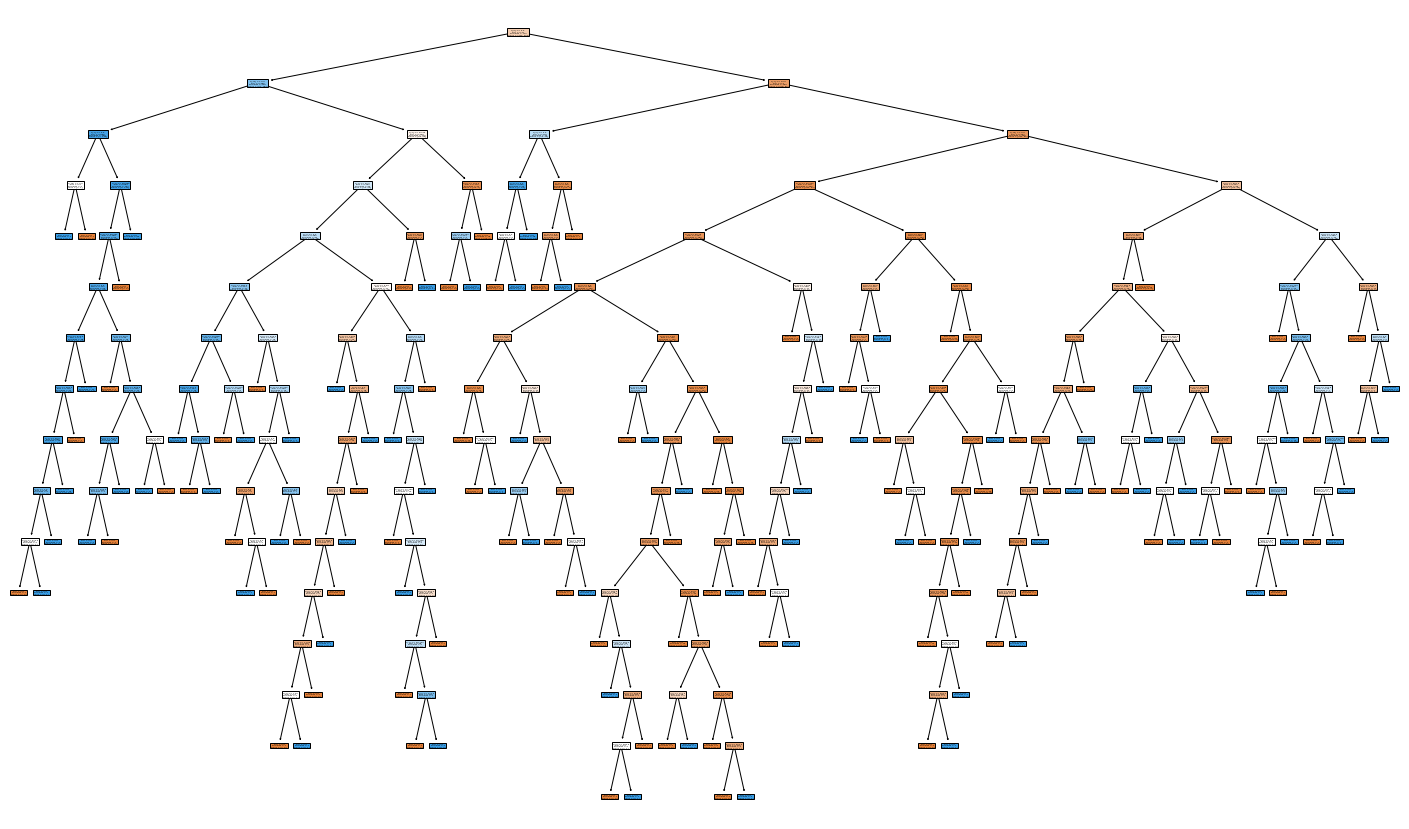

In [10]:
fig = plt.figure(figsize=(25,15))
_ = tree.plot_tree(dtc_1, 
                   #feature_names=ind.feature_names,  
                   #class_names=dep.target_names,
                   filled=True)